In [1]:
import pandas as pd
from sklearn import cluster
import pickle
from sklearn.externals import joblib

In [2]:
loans = pd.read_csv('../Part 1/loans_clean.csv')

In [26]:
#loans.drop('grade', axis=1, inplace=True)
#loans.drop('sub_grade', axis=1, inplace=True)
#loans.drop('set', axis=1, inplace=True)
#loans.drop('timestamp', axis=1, inplace=True)

In [3]:
pd.options.display.max_columns = 101

loans.head()

,id,loan_amnt,term,int_rate,emp_length,annual_inc,dti,delinq_2yrs,fico_range_low,mths_since_last_delinq,open_acc,revol_bal,revol_util,total_acc,collections_12_mths_ex_med,policy_code,application_type,tot_cur_bal,bc_util,chargeoff_within_12_mths,mo_sin_old_il_acct,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_tl,num_il_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,total_bc_limit,home_ANY,home_MORTGAGE,home_NONE,home_OTHER,home_OWN,home_RENT,st_AK,st_AL,st_AR,st_AZ,st_CA,st_CO,st_CT,st_DC,st_DE,st_FL,st_GA,st_HI,st_IA,st_ID,st_IL,st_IN,st_KS,st_KY,st_LA,st_MA,st_MD,st_ME,st_MI,st_MN,st_MO,st_MS,st_MT,st_NC,st_ND,st_NE,st_NH,st_NJ,st_NM,st_NV,st_NY,st_OH,st_OK,st_OR,st_PA,st_RI,st_SC,st_SD,st_TN,st_TX,st_UT,st_VA,st_VT,st_WA,st_WI,st_WV,st_WY
0,10149342,27050.0,36,10.99,10.0,55000.0,22.87,0.0,730.0,195.0,14.0,36638.0,61.2,27.0,0.0,1.0,0,114834.0,53.9,0.0,117.0,6.0,4.0,16.0,8.0,0.0,2.0,4.0,8.0,8.0,15.0,4.0,14.0,0.0,0.0,1.0,25.0,0.0,0.0,35700.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,10149488,4800.0,36,10.99,2.0,39600.0,2.49,0.0,755.0,195.0,3.0,4136.0,16.1,8.0,0.0,1.0,0,4136.0,16.1,0.0,104.0,25.0,0.0,25.0,3.0,0.0,2.0,2.0,4.0,1.0,7.0,2.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,25700.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,10119623,12000.0,36,11.99,10.0,130000.0,13.03,0.0,715.0,195.0,9.0,10805.0,67.0,19.0,0.0,1.0,0,327264.0,93.0,0.0,173.0,4.0,3.0,85.0,4.0,0.0,3.0,5.0,4.0,8.0,8.0,5.0,9.0,0.0,0.0,3.0,1.0,0.0,0.0,10700.0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,10129506,20800.0,36,13.53,10.0,81500.0,16.73,0.0,685.0,64.0,29.0,23473.0,54.5,41.0,0.0,1.0,0,23473.0,54.6,0.0,115.0,0.0,0.0,0.0,0.0,1.0,8.0,24.0,17.0,1.0,40.0,24.0,29.0,0.0,0.0,3.0,50.0,0.0,0.0,15000.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,10159611,10000.0,36,9.67,7.0,102000.0,15.55,2.0,670.0,11.0,9.0,9912.0,44.4,22.0,0.0,1.0,0,39143.0,89.4,0.0,243.0,8.0,0.0,25.0,8.0,1.0,3.0,4.0,6.0,9.0,13.0,4.0,9.0,0.0,0.0,1.0,66.7,0.0,0.0,9200.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## K Means

In [6]:
k_means=cluster.KMeans(n_clusters=7)

In [7]:
loans_y = loans['int_rate']
loans_x = loans.drop('int_rate', axis=1)

In [8]:
k_means.fit(loans_x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=7, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [9]:
labels7 = k_means.labels_

In [10]:
k_means

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=7, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [11]:
#pickle.dump(k_means, open('kmeans.pkl', 'wb'))
with open('/Users/emily-air13/Desktop/code/INFO-7390-ADS-Fall-17-TeamNo.4/Assignment 2/Prediction/kmeans.pkl', 'wb') as f:
    joblib.dump(k_means, f)

In [10]:
loans2 = pd.read_csv('../loanstats.csv')

In [13]:
loans2['kcluster7'] = labels7

In [15]:
loans2['kcluster7'].value_counts()

3    279997
5    235023
2    234444
0    233309
6    224882
4    186810
1    118418
Name: kcluster7, dtype: int64

In [16]:
loans2['grade'].value_counts()

C    455309
B    445905
A    249686
D    216608
E    101833
F     33678
G      9864
Name: grade, dtype: int64

In [17]:
pd.crosstab(loans2.grade,loans2.kcluster7)

kcluster7,0,1,2,3,4,5,6
grade,,,,,,,
A,47925,18730,40753,36148,33485,33411,39234
B,70153,29857,69577,87655,49472,74040,65151
C,64011,32778,80493,94882,52861,65832,64452
D,28943,22087,27128,39810,29272,37453,31915
E,15294,10710,10653,14767,16065,16249,18095
F,5498,3291,3380,5273,4564,6642,5030
G,1485,965,2460,1462,1091,1396,1005


# K Means Attempt 2

In [8]:
k_means2=cluster.KMeans(n_clusters=7, max_iter=600)
loans_y = loans['int_rate']
loans_x = loans.drop('int_rate', axis=1)
k_means2.fit(loans_x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=600,
    n_clusters=7, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [12]:
loans2['kcluster7_2'] = k_means2.labels_
pd.crosstab(loans2.grade,loans2.kcluster7_2)

kcluster7_2,0,1,2,3,4,5,6
grade,,,,,,,
A,39216,18550,36148,33507,40753,33592,47920
B,65124,29498,87655,49508,69577,74400,70143
C,64421,32382,94882,52905,80493,66229,63997
D,31895,21794,39810,29293,27128,37748,28940
E,18092,10581,14767,16070,10653,16378,15292
F,5028,3257,5273,4567,3380,6676,5497
G,1003,958,1462,1092,2460,1404,1485


# K Means Attempt 3

In [14]:
keep = ['fico_range_low','total_bc_limit','mths_since_recent_inq','mo_sin_rcnt_tl','tot_cur_bal',
        'mths_since_recent_bc',
        'mort_acc','num_bc_tl','mo_sin_old_il_acct','home_MORTGAGE','mths_since_last_delinq','num_rev_accts',
        'annual_inc','pub_rec_bankruptcies','home_RENT','num_actv_rev_tl','num_rev_tl_bal_gt_0','loan_amnt',
        'dti','num_tl_op_past_12m','revol_util','percent_bc_gt_75','bc_util','term']

features = loans[keep]

In [15]:
k_means3=cluster.KMeans(n_clusters=7, max_iter=600)
k_means3.fit(features)
loans2['kcluster7_3'] = k_means3.labels_
pd.crosstab(loans2.grade,loans2.kcluster7_3)

kcluster7_3,0,1,2,3,4,5,6
grade,,,,,,,
A,108616,49439,0,17902,71654,24,2051
B,243101,66453,1,20678,113670,30,1972
C,260710,62742,0,18532,111689,23,1613
D,129374,27180,0,7571,51836,4,643
E,59843,12964,0,3610,25085,3,328
F,19938,4301,0,1151,8196,0,92
G,5871,1300,0,335,2334,0,24


# K Means Attempt 4

In [16]:
k_means4=cluster.KMeans(n_clusters=3, max_iter=500)
k_means4.fit(loans_x)
loans2['kcluster7_4'] = k_means4.labels_
pd.crosstab(loans2.grade,loans2.kcluster7_4)

kcluster7_4,0,1,2
grade,,,
A,78960,60281,110445
B,160669,116253,168983
C,178322,111631,165356
D,68124,66993,81491
E,25842,30683,45308
F,8783,11042,13853
G,3964,2642,3258


# K Means Attempt 5

In [22]:
k_means5=cluster.KMeans(n_clusters=5, max_iter=1000)
k_means5.fit(features)
loans2['kcluster7_5'] = k_means5.labels_
pd.crosstab(loans2.grade,loans2.kcluster7_5)

kcluster7_5,0,1,2,3,4
grade,,,,,
A,84609,0,5716,117774,41587
B,128449,1,5775,259274,52406
C,124920,0,4793,277154,48442
D,56831,0,1903,137304,20570
E,27586,0,932,63594,9721
F,8968,0,276,21196,3238
G,2555,0,72,6279,958


## K Means Attempt to Recreate Sub Grades

In [18]:
k_means35=cluster.KMeans(n_clusters=35)
k_means35.fit(loans_x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=35, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [19]:
loans2['kcluster35'] = k_means35.labels_

In [20]:
pd.crosstab(loans2.sub_grade,loans2.kcluster35)

kcluster35,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34
sub_grade,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
A1,2201,859,2557,1687,657,987,1492,1183,591,1531,600,638,1109,1085,1638,7015,1862,1468,1139,2174,550,590,792,2385,2022,2244,1625,781,779,1283,762,1621,621,1551,1191
A2,1739,834,1793,1338,950,1171,1102,1139,797,1021,632,836,702,919,1413,2212,1480,1150,1050,1466,704,945,764,1343,1275,1795,962,436,1138,1306,546,1189,694,1150,860
A3,1529,778,1671,1236,1379,1092,899,1047,735,906,638,816,663,928,1209,2159,1892,1481,1024,1392,1142,956,659,1167,1272,1534,907,496,1009,1387,503,1172,771,1155,826
A4,1563,1017,1984,1392,2088,1722,3876,1200,1142,1034,1211,1092,748,1175,1696,2810,1784,2203,1473,1892,1691,1481,743,1233,1410,1533,963,848,1663,1384,1032,1545,1087,1297,1198
A5,2639,1010,2942,1842,2379,2393,1965,2144,1600,1478,1444,1505,1001,1577,2593,3103,2478,3001,2117,2829,1949,2138,1167,1963,1864,2769,1302,1026,2384,2083,1151,2486,1202,1707,1694
B1,3152,1037,3469,3858,2503,1818,2352,2454,1353,2252,1424,1310,1701,2612,2886,3669,3537,2764,1807,3055,2047,1675,2132,2269,3235,3314,2184,1085,1791,4305,1392,2623,973,3704,1820
B2,2988,1060,3801,3097,2781,1879,2413,2202,1451,1706,1597,1295,1215,2974,2649,3949,3328,4549,1812,3181,2158,1752,2044,2361,2439,3228,1519,1146,1897,4744,1442,2473,1110,2575,1950
B3,3274,1248,3983,3183,3132,2262,2840,2398,1560,1942,1820,1420,1258,3276,2775,4585,3490,5365,2107,3716,2521,1975,2105,2612,2513,3500,1639,1260,2066,4974,1699,2683,1234,2716,2097
B4,2894,1223,3973,3961,3009,2477,2874,2336,1732,1975,1973,1606,1426,4066,2638,4508,2933,5032,2136,3654,2367,2081,2746,2592,2999,2988,1817,1228,2408,5123,1839,2598,1295,3384,2064


## K Means with Initial Application Features
These are the features used in classifying a loan as accepted or declined. They could be used to determine the high-level loan grade.

#### Attempt 1 - 7 clusters, defaults

In [21]:
application = ['fico_range_low','dti','loan_amnt','term']
k_means7=cluster.KMeans(n_clusters=7)
k_means7.fit(loans_x[application])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=7, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [22]:
loans2['kclusters7'] = k_means7.labels_

In [23]:
pd.crosstab(loans2.grade,loans2.kclusters7)

kclusters7,0,1,2,3,4,5,6
grade,,,,,,,
A,41329,14661,54244,34297,74242,22794,8119
B,71488,21816,112092,58086,134592,30097,17734
C,77244,28491,100578,62911,121863,36926,27296
D,38463,16654,42032,31458,51626,20014,16361
E,18814,10130,12928,17428,20299,11704,10530
F,6403,4188,3217,6106,5727,4209,3828
G,1914,1384,534,1805,1614,1256,1357


#### Attempt 2 - increase number of iterations

In [23]:
application = ['fico_range_low','dti','loan_amnt','term']
k_means7_f=cluster.KMeans(n_clusters=7, max_iter=1000)
k_means7_f.fit(loans_x[application])
loans2['kclusters7_f'] = k_means7_f.labels_
pd.crosstab(loans2.grade,loans2.kclusters7_f)

kclusters7_f,0,1,2,3,4,5,6
grade,,,,,,,
A,56305,24493,8119,41288,72193,14683,32605
B,115571,32320,17734,71390,131148,21860,55882
C,103171,39358,27296,77072,119328,28559,60525
D,42957,21168,16361,38278,50774,16762,30308
E,13200,12298,10530,18666,20062,10207,16870
F,3295,4379,3828,6346,5666,4213,5951
G,549,1292,1357,1889,1608,1402,1767


# KMeans with user input features

THough only certain features are used to determine loan eligibility, there are additioanl features a user might reasonably be expected to put on their application before their credit report is pulled.

In [83]:
columns = ['int_rate','grade','loan_amnt','term','emp_length','home_ownership','annual_inc','addr_state',
           'dti','delinq_2yrs','fico_range_low','open_acc','revol_bal','collections_12_mths_ex_med',
           'tot_cur_bal','mo_sin_old_il_acct','mort_acc','pub_rec_bankruptcies','tax_liens',
           'total_bc_limit'] #'mo_sin_rcnt_tl',

filtered_loans=loans[columns]
cluster_loans=filtered_loans.drop('int_rate', axis=1)
cluster_loans.drop('grade', axis=1, inplace=True)

#### Attempt 1 - 7 clusters, defaults

In [85]:
k_means=cluster.KMeans(n_clusters=7)
k_means.fit(cluster_loans)
filtered_loans['kclusters'] = k_means.labels_
filtered_loans['kclusters'].value_counts()

5    780826
0    340404
3    242539
6    116476
2     29592
1      2961
4        84
Name: kclusters, dtype: int64

In [86]:
pd.crosstab(filtered_loans.grade,filtered_loans.kclusters)

kclusters,0,1,2,3,4,5,6
grade,,,,,,,
A,60811,899,8247,50905,24,101170,27630
B,100052,860,8749,71884,30,229663,34666
C,100133,724,7530,68441,23,246642,31816
D,47029,290,2980,30380,4,122531,13394
E,22749,143,1480,14687,3,56502,6269
F,7476,36,485,4799,0,18806,2076
G,2154,9,121,1443,0,5512,625


#### Attempt 2 - More iterations, random start
The data is clustering oddly, possibly due to the centroid starting places, so we are increasing the number of iterations and removing the "smart" starting places for the centroids

In [96]:
k_means2=cluster.KMeans(n_clusters=7, n_init=20, init='random')
k_means2.fit(cluster_loans)
filtered_loans['kclusters2'] = k_means2.labels_
filtered_loans['kclusters2'].value_counts()

0    780802
6    340391
5    242560
3    116489
2     29595
1      2961
4        84
Name: kclusters2, dtype: int64

In [97]:
pd.crosstab(filtered_loans.grade,filtered_loans.kclusters2)

kclusters2,0,1,2,3,4,5,6
grade,,,,,,,
A,101168,899,8248,27633,24,50906,60808
B,229654,860,8749,34672,30,71888,100051
C,246634,724,7531,31818,23,68448,100131
D,122528,290,2981,13394,4,30387,47024
E,56501,143,1480,6270,3,14689,22747
F,18805,36,485,2077,0,4798,7477
G,5512,9,121,625,0,1444,2153


### KMeans Conclusion
Of the various K Means attempts, our first comes the closest to approximating the Lending Club grades. Five of the seven clusters are a mode for one of the grades, with four of them having unique modes, and B, C and D share a mode which is a logical grouping. It is likely selecting based on a feature shared by those three adjacent groups. (Conversely, all clusters have B or C loans as their mode, however this is a reflection of the fact that the majority of all loans are B or C.)

## Attempt at Mannually Reproducing "Grades"

In [24]:
def manual_clusters(fico, dti, amnt, term):
    if fico > 700 and dti < 30 and amnt < 20000:
        return 'Group1'
    elif (fico > 780 and dti < 30 and amnt < 20000 and term==' 36 months') or (fico > 700 and term==' 60 months'):
        return 'Group2'
    elif dti < 30 and amnt < 20000 and term==' 36 months': 
        return 'Group3'
    elif dti < 30 and term==' 36 months': # amnt < 25000 
        return 'Group4'
    elif fico > 670 and dti < 30 and amnt < 30000:
        return 'Group5'
    elif dti < 30:
        return 'Group6'
    else:
        return 'Group7'

loans2['manual_cat'] = loans2.apply(lambda x: manual_clusters(x['fico_range_low'], x['dti'], x['loan_amnt'], x['term']), axis=1)

In [25]:
pd.crosstab(loans2.grade, loans2.manual_cat)

manual_cat,Group1,Group2,Group3,Group4,Group5,Group6,Group7
grade,,,,,,,
A,119503,4538,54232,61273,1231,96,8813
B,92241,27984,209915,63078,17985,5702,29000
C,50738,34290,178094,50144,55022,40434,46587
D,14703,13406,71978,21781,29494,32286,32960
E,5109,7595,19620,5986,19962,26215,17346
F,1493,2273,4017,981,7343,11837,5734
G,305,613,710,322,2177,3882,1855


The above code is the best iteration of several attempts to recreate the grades based on features identified in our EDA as having a relationship to grade. It does seem to be targetting enough of what makes the 'A's unique to give that grade a unique mode for cluster group, however we were not as successful in identifying what differentiates the remaining grades from each other. We are thus going to use a simpler manual clustering based solely on credit score shown below.

## Group by Credit Score

In [26]:
def manual_clusters(fico):
    if fico > 720:
        return 'Group1'
    elif fico > 700:
        return 'Group2'
    elif fico > 690: 
        return 'Group3'
    elif fico > 680: # amnt < 25000 
        return 'Group4'
    elif fico > 670:
        return 'Group5'
    else:
        return 'Group6'

loans2['manual_cat2'] = loans2.apply(lambda x: manual_clusters(x['fico_range_low']), axis=1)

In [27]:
pd.crosstab(loans2.grade, loans2.manual_cat2)

manual_cat2,Group1,Group2,Group3,Group4,Group5,Group6
grade,,,,,,
A,117173,59007,26135,22643,14908,9820
B,72469,83718,56164,61101,67496,104957
C,38872,66303,53631,67209,82843,146451
D,11193,24129,22494,31345,42095,85352
E,4342,10076,10259,15132,20504,41520
F,1208,2829,3077,4715,6889,14960
G,290,702,801,1329,2049,4693


# T-SNE Visualization

In [4]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
#from matplotlib.ticker import NullFormatter
from matplotlib.pyplot import cm
from sklearn import manifold, datasets

### All Data

In [10]:
loans_samp=loans.sample(n=8000)

In [18]:
tsne = TSNE(perplexity=100, n_iter=500)

In [19]:
Y = tsne.fit_transform(loans_samp)


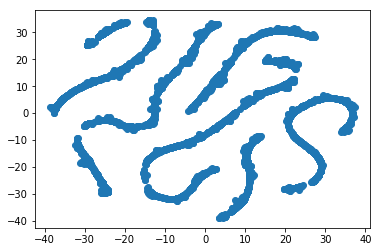

In [20]:
plt.scatter(Y[:, 0], Y[:, 1], cmap=plt.cm.Spectral)
plt.show()

### KMeans Clusters

In [21]:
k_means = joblib.load(open('kmeans.pkl', 'rb'))
loans['kcluster'] = k_means.labels_
kc0 = loans[loans['kcluster']==0]
kc1 = loans[loans['kcluster']==1]
kc2 = loans[loans['kcluster']==2]
kc3 = loans[loans['kcluster']==3]
kc4 = loans[loans['kcluster']==4]
kc5 = loans[loans['kcluster']==5]
kc6 = loans[loans['kcluster']==6]

samp0= kc0.sample(n=8000)
samp1= kc1.sample(n=8000)
samp2= kc2.sample(n=8000)
samp3= kc3.sample(n=8000)
samp4= kc4.sample(n=8000)
samp5= kc5.sample(n=8000)
samp6= kc6.sample(n=8000)


In [22]:
tsne2 = TSNE(perplexity=100, n_iter=500)

In [23]:
Y0 = tsne2.fit_transform(samp0)
Y1 = tsne2.fit_transform(samp1)
Y2 = tsne2.fit_transform(samp2)
Y3 = tsne2.fit_transform(samp3)
Y4 = tsne2.fit_transform(samp4)
Y5 = tsne2.fit_transform(samp5)
Y6 = tsne2.fit_transform(samp6)

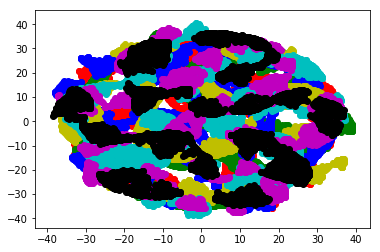

In [24]:
plt.close('all')
plt.scatter(Y0[:, 0], Y0[:, 1], c='r')
plt.scatter(Y1[:, 0], Y1[:, 1], c='g')
plt.scatter(Y2[:, 0], Y2[:, 1], c='b')
plt.scatter(Y3[:, 0], Y3[:, 1], c='y')
plt.scatter(Y4[:, 0], Y4[:, 1], c='c')
plt.scatter(Y5[:, 0], Y5[:, 1], c='m')
plt.scatter(Y6[:, 0], Y6[:, 1], c='k')
plt.show()

In [27]:
tsne3 = TSNE(perplexity=200, n_iter=250)

In [28]:
Y0 = tsne3.fit_transform(samp0)
Y1 = tsne3.fit_transform(samp1)
Y2 = tsne3.fit_transform(samp2)
Y3 = tsne3.fit_transform(samp3)
Y4 = tsne3.fit_transform(samp4)
Y5 = tsne3.fit_transform(samp5)
Y6 = tsne3.fit_transform(samp6)

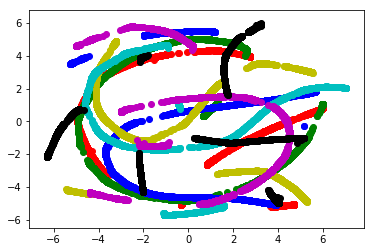

In [29]:
plt.close('all')
plt.scatter(Y0[:, 0], Y0[:, 1], c='r')
plt.scatter(Y1[:, 0], Y1[:, 1], c='g')
plt.scatter(Y2[:, 0], Y2[:, 1], c='b')
plt.scatter(Y3[:, 0], Y3[:, 1], c='y')
plt.scatter(Y4[:, 0], Y4[:, 1], c='c')
plt.scatter(Y5[:, 0], Y5[:, 1], c='m')
plt.scatter(Y6[:, 0], Y6[:, 1], c='k')
plt.show()